In [ ]:
!git clone https://github.com/LoriSchuan-dev/feature_engineering_project2021.git

Cloning into 'feature_engineering_project2021'...
remote: Enumerating objects: 236, done.
remote: Counting objects: 100% (236/236), done.
remote: Compressing objects: 100% (205/205), done.
remote: Total 236 (delta 70), reused 150 (delta 28), pack-reused 0
Receiving objects: 100% (236/236), 241.37 MiB | 31.27 MiB/s, done.
Resolving deltas: 100% (70/70), done.
Checking out files: 100% (116/116), done.


In [ ]:
!pip install mediapipe

     |████████████████████████████████| 32.8 MB 1.6 MB/s 


In [ ]:
import mediapipe as mp
from urllib import request
import os
from matplotlib import pyplot as plt

In [ ]:
#load images and sort
image_list = os.listdir('/content/feature_engineering_project2021/pose_frames_segmented_pngs')
temp = {}
frame_num = str(list(range(1,7)))
for frame in image_list:
  for i in frame_num:
    if i in frame:
      if i not in temp.keys():
        temp[i] = [frame]
      else:
        temp[i].append(frame)
image_list = {x:sorted(temp[x]) for x in temp.keys()}

In [ ]:
image_list

{'1': ['pose_1_frame.png',
  'pose_1_frame_jong.png',
  'pose_1_frame_lori.png',
  'pose_1_frame_mikaela.png'],
 '2': ['pose_2_frame.png',
  'pose_2_frame_jong.png',
  'pose_2_frame_lori.png',
  'pose_2_frame_mikaela.png'],
 '3': ['pose_3_frame.png',
  'pose_3_frame_jong.png',
  'pose_3_frame_lori.png',
  'pose_3_frame_mikaela.png'],
 '4': ['pose_4_frame.png',
  'pose_4_frame_jong.png',
  'pose_4_frame_lori.png',
  'pose_4_frame_mikaela.png'],
 '5': ['pose_5_frame.png',
  'pose_5_frame_jong.png',
  'pose_5_frame_lori.png',
  'pose_5_frame_mikaela.png'],
 '6': ['pose_6_frame.png',
  'pose_6_frame_jong.png',
  'pose_6_frame_lori.png',
  'pose_6_frame_mikaela.png']}

In [ ]:
cd /content/feature_engineering_project2021/pose_frames_segmented_pngs

/content/feature_engineering_project2021/pose_frames_segmented_pngs


In [ ]:
!pwd

/content/feature_engineering_project2021/pose_frames_segmented_pngs


pose_6_frame.png
similarity: None


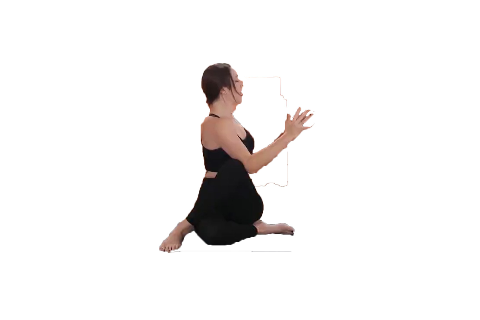

pose_6_frame_jong.png
similarity: None


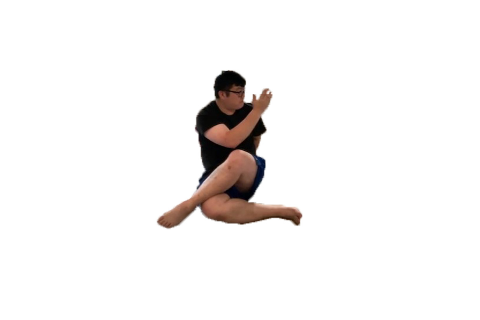

pose_6_frame_lori.png
similarity: None


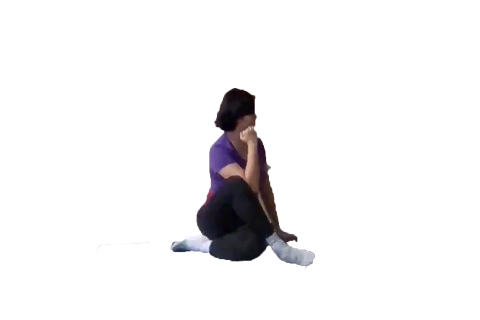

pose_6_frame_mikaela.png
similarity: None


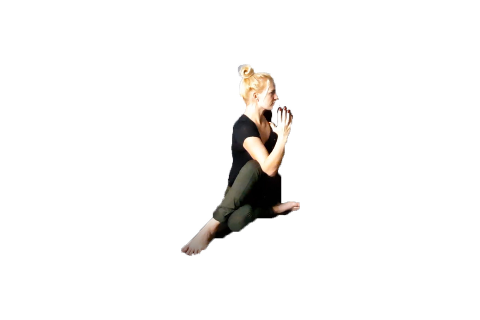

pose_4_error
similarity: None


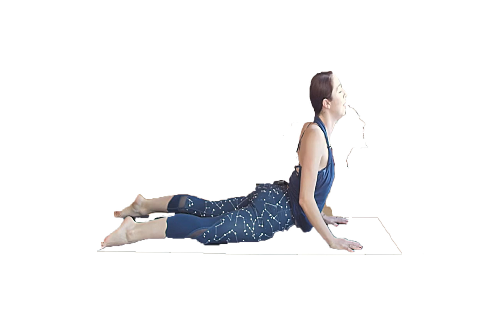

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image, title=None):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  print('similarity:',title)
  cv2_imshow(img)

# Read images with OpenCV.
frame_num = '6' # chooes frame_num
images = {name: cv2.imread(name) for name in image_list[frame_num]} 
#add other pose to check similarity
images['pose_4_error'] = cv2.imread('pose_1_frame.png')
# Preview the images.
for name, image in images.items():
  print(name)   
  resize_and_show(image)

In [ ]:
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

# help(mp_pose.Pose)

Nose coordinates: (873.5072250366211, 303.08000564575195)
Pose landmarks of pose_6_frame.png:
similarity: None


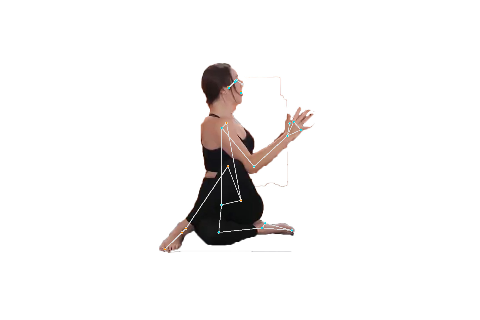

Nose coordinates: (590.3734285831451, 240.21513104438782)
Pose landmarks of pose_6_frame_jong.png:
similarity: None


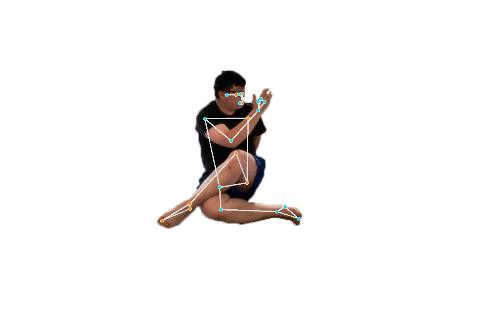

Nose coordinates: (923.1879501342773, 440.97126388549805)
Pose landmarks of pose_6_frame_lori.png:
similarity: None


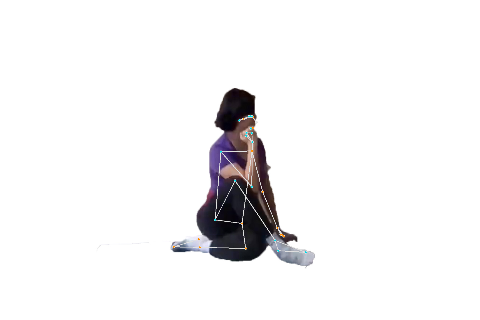

Nose coordinates: (662.905632019043, 233.9556884765625)
Pose landmarks of pose_6_frame_mikaela.png:
similarity: None


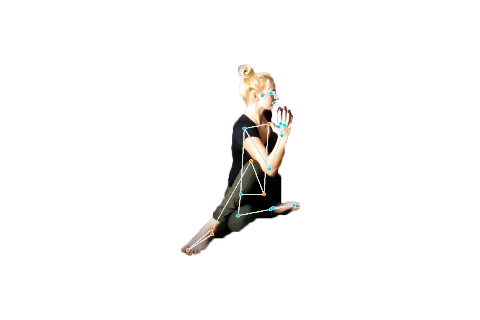

Nose coordinates: (1260.2720489501953, 361.8724822998047)
Pose landmarks of pose_4_error:
similarity: None


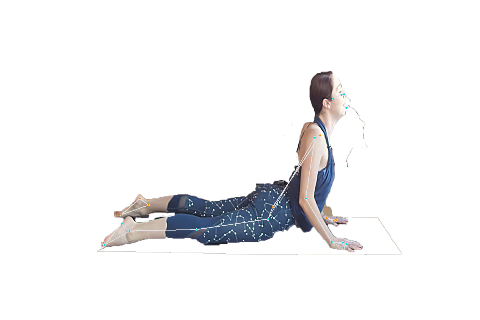

In [ ]:
# Run MediaPipe Pose and draw pose landmarks.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.3, model_complexity=2) as pose: 
    #You can change parameters mdc =>(0~1) model_complexity => 0,1,2
    #default mdc = 0.5 mc = 2
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Print nose landmark.
    image_hight, image_width, _ = image.shape
    if not results.pose_landmarks:
      continue
    print(
      f'Nose coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_hight})'
    )

    # Draw pose landmarks.
    print(f'Pose landmarks of {name}:')
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    resize_and_show(annotated_image)

Nose world landmark:
x: 0.10596925020217896
y: -0.6198475956916809
z: 0.044038329273462296
visibility: 0.9997890591621399



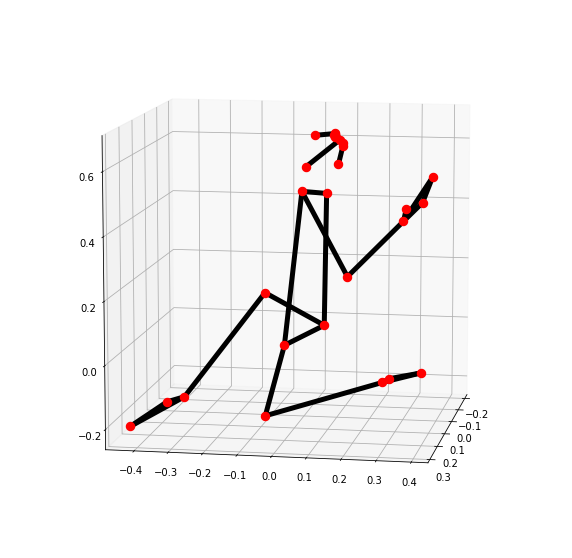

Nose world landmark:
x: 0.10203379392623901
y: -0.5106785297393799
z: 0.10779266804456711
visibility: 0.985622227191925



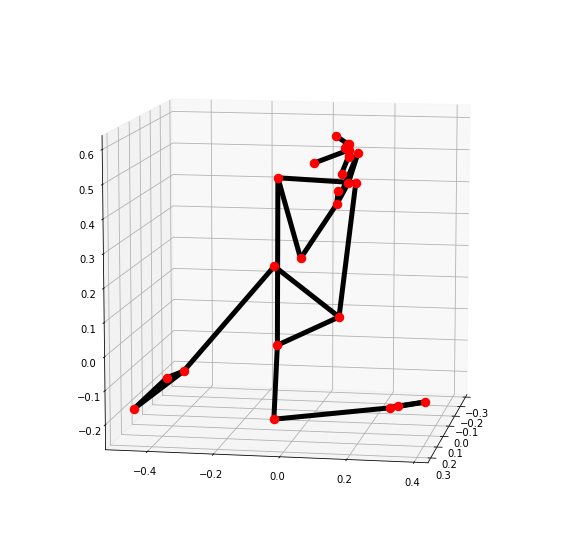

Nose world landmark:
x: 0.18606847524642944
y: -0.5359492301940918
z: -0.04784302040934563
visibility: 0.9997789263725281



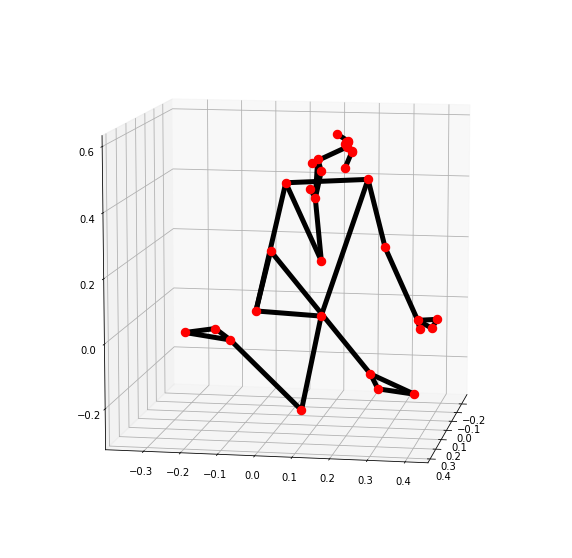

Nose world landmark:
x: 0.20461873710155487
y: -0.5461560487747192
z: -0.00943062175065279
visibility: 0.999875545501709



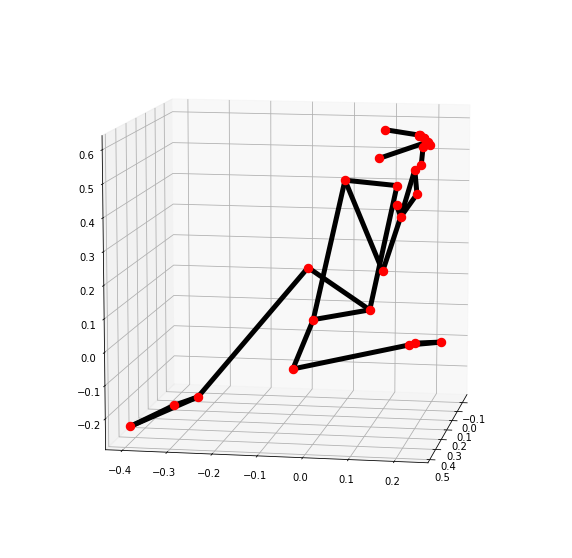

Nose world landmark:
x: 0.4079743027687073
y: -0.5424261689186096
z: -0.22621075809001923
visibility: 0.9995912909507751



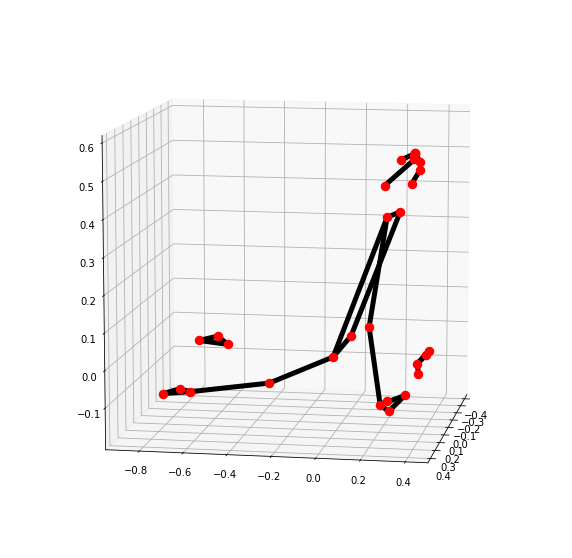

In [ ]:
# Run MediaPipe Pose and plot 3d pose world landmarks.
coordinates_data = []
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  for name, image in images.items():
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print the real-world 3D coordinates of nose in meters with the origin at
    # the center between hips.
    print('Nose world landmark:'),
    print(results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.NOSE])
    
    # Plot pose world landmarks.
    mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
    # print(mp_pose.POSE_CONNECTIONS)
    coordinates_data.append(results.pose_world_landmarks.landmark)

3d coordinates of 33 points

In [ ]:
import pandas as pd
df_ = []
for result_landmark in coordinates_data:
  coordinates_3d = []
  for coordinate in result_landmark:
    temp = {'x': coordinate.x, 'y': coordinate.y, 'z': coordinate.z, 'v': coordinate.visibility}
    coordinates_3d.append(temp)
    # print(temp)

  df = pd.DataFrame.from_dict(coordinates_3d)
  df_.append(df)

In [ ]:
df_[0]

,x,y,z,v
0,0.105969,-0.619848,0.044038,0.999789
1,0.077716,-0.644138,0.043461,0.999932
2,0.078153,-0.647992,0.053798,0.999936
3,0.077782,-0.646580,0.051786,0.999952
4,0.093766,-0.646563,0.010615,0.999956
5,0.093253,-0.645433,0.002801,0.999969
6,0.100909,-0.633160,0.021160,0.999978
7,0.004144,-0.627590,0.104365,0.999991
8,0.011751,-0.555005,-0.024178,0.999982
9,0.096987,-0.601957,0.072800,0.999953


To make animation using coordinates (not finished)

In [ ]:
import plotly.graph_objs as go
import plotly

# fig = px.scatter_3d(df, x='x', y='y', z='z')
# fig.show()

pairs = list(mp_pose.POSE_CONNECTIONS)
df = df_[0]
# df = df_[1]
# df = df_[2]
trace1 = go.Scatter3d(
    x=df.x,
    y=df.y,
    z=df.z,
    mode='markers+text',   
    marker=dict(
          color='blue',
          size=2,
          ),                           
    name='COCO 33',
    text = df.index,
    textposition='top right'
    )

x_lines = list()
y_lines = list()
z_lines = list()

for p in pairs:
    for i in range(2):
        x_lines.append(df.x[p[i]])
        y_lines.append(df.y[p[i]])
        z_lines.append(df.z[p[i]])
    x_lines.append(None)
    y_lines.append(None)
    z_lines.append(None)

trace2 = go.Scatter3d(
    x=x_lines,
    y=y_lines,
    z=z_lines,
    mode='lines',
    name='lines'
    )

fig = go.Figure(data=[trace1, trace2])
config = {'displayModeBar': True}
fig.show(config=config)
fig.write_html("test.html")

Connection info of land marks (33 points)

In [ ]:
pose_connections = list(mp_pose.POSE_CONNECTIONS)
pose_connections
dict_connections = {}
for landmark in pose_connections:
  if landmark[0] in dict_connections.keys():
    dict_connections[landmark[0]] = dict_connections[landmark[0]] + [landmark[1]]
  else: 
    dict_connections.setdefault(landmark[0], [landmark[1]])
  if landmark[1] in dict_connections.keys():
    dict_connections[landmark[1]] = dict_connections[landmark[1]] + [landmark[0]]
  else: 
    dict_connections.setdefault(landmark[1], [landmark[0]]) 


In [ ]:
dict_connections = dict(sorted(dict_connections.items()))
dict_connections #[landmark numbers] at each point.

{0: [4, 1],
 1: [2, 0],
 2: [1, 3],
 3: [7, 2],
 4: [0, 5],
 5: [6, 4],
 6: [5, 8],
 7: [3],
 8: [6],
 9: [10],
 10: [9],
 11: [23, 13, 12],
 12: [24, 14, 11],
 13: [11, 15],
 14: [12, 16],
 15: [19, 13, 17, 21],
 16: [22, 18, 14, 20],
 17: [19, 15],
 18: [16, 20],
 19: [15, 17],
 20: [18, 16],
 21: [15],
 22: [16],
 23: [11, 25, 24],
 24: [26, 12, 23],
 25: [27, 23],
 26: [24, 28],
 27: [25, 29, 31],
 28: [26, 30, 32],
 29: [27, 31],
 30: [32, 28],
 31: [29, 27],
 32: [30, 28]}

In [ ]:
print(df.iloc[0,0:3] , df.iloc[1,0:3])
df.iloc[0,0:3] - df.iloc[1,0:3]

x    0.105969
y   -0.619848
z    0.044038
Name: 0, dtype: float64 x    0.077716
y   -0.644138
z    0.043461
Name: 1, dtype: float64


x    0.028253
y    0.024290
z    0.000578
dtype: float64

Calculate angle 

In [ ]:
from numpy import (array, dot, arccos, clip)
from numpy.linalg import norm
from itertools import combinations

def cal_angle(u,v):
  c = dot(u,v)/norm(u)/norm(v) # -> cosine of the angle
  angle = arccos(clip(c,-1,1)) # radian angle
  return angle

def landmark_angle(num_pose_landmark, df):
  results = []
  for i in range(len(num_pose_landmark)):
    if i in list(range(0,11))+[21,22]: #don't calculate face part (except nose) and thumb(L,R) 
      if i == 0: #nose 
        center_shoulder = np.divide((df.iloc[11,0:3] + df.iloc[12,0:3]), 2) # center of shoulder line
        nose_2_shoulder_vector = df.iloc[i,0:3] - center_shoulder
        results.append([cal_angle(nose_2_shoulder_vector,np.array([1,0,0])), #with x axis
                        cal_angle(nose_2_shoulder_vector,np.array([0,1,0])), #with y axis
                        cal_angle(nose_2_shoulder_vector,np.array([0,0,1])) #with z axis
                        ]) 
        
      else:
        pass
      continue
    coordinate = num_pose_landmark[i]

    temp_vectors = []
    for j in coordinate:
      temp_vectors.append(df.iloc[i,0:3]-df.iloc[j,0:3])
    if len(coordinate) == 2:
      temp_vectors.append(df.iloc[i,0:3])     

    temp_angles = []  
    for k in list(combinations(temp_vectors, 2)):
      temp_angles.append(cal_angle(k[0],k[1]))

    results.append(temp_angles)

  return results

test_1 = landmark_angle(dict_connections, df_[0])
test_2 = landmark_angle(dict_connections, df_[1])
test_3 = landmark_angle(dict_connections, df_[2])
test_4 = landmark_angle(dict_connections, df_[3])
#other pose to test similarity
test_5 = landmark_angle(dict_connections, df_[4])

In [ ]:
index = [0] + list(range(11,21)) + list(range(23,33)) 
total_tests = pd.DataFrame({'test1': test_1, 
                            'test2': test_2, 
                            'test3': test_3, 
                            'test4': test_4}, index=index)
total_tests

,test1,test2,test3,test4
0,"[1.0698662791737064, 2.52343332898582, 1.90116...","[0.8355122010825536, 2.0988427656424533, 2.146...","[1.0768388547494963, 2.24253728062994, 2.24313...","[0.8350716155288302, 2.25986426061536, 1.96190..."
11,"[0.7408039795071854, 1.4863130298936742, 2.170...","[0.5887898891617289, 1.381030708827406, 1.7521...","[0.5583643650210374, 1.3055551177625535, 1.863...","[0.3835986356755362, 1.4748757441112756, 1.742..."
12,"[0.59994791364987, 1.4556232241006353, 1.43860...","[0.4806051639478331, 1.5574998841670302, 1.492...","[0.8219026251895332, 1.7606618078047893, 1.538...","[0.5147998649416915, 1.485826258680731, 1.3411..."
13,"[2.425253635387602, 1.5954282664348975, 2.2535...","[2.7786469641953144, 2.1311886549447876, 1.166...","[2.984886533857672, 1.866876727299835, 1.39409...","[0.7602077765997081, 2.269479995582289, 2.6306..."
14,"[1.267763611181141, 1.9753837882388956, 2.8799...","[1.5239461939039913, 2.188559403866309, 2.4550...","[1.2529383691853342, 1.5260205025673081, 2.696...","[0.5639871084786005, 2.093293058513185, 2.5823..."
15,"[1.9739116579428062, 0.30626289792111855, 1.98...","[1.0395024243241984, 0.24377647588353468, 0.96...","[2.5399789277120326, 0.5447978371916556, 0.833...","[2.775771058995303, 0.05728317798554271, 0.877..."
16,"[0.7990350254788128, 2.587807186864231, 0.4359...","[0.6788878001621157, 2.59733679263669, 0.32978...","[0.7663778897346656, 2.5639629237994064, 0.565...","[0.7969894252562723, 2.6502728774477395, 0.483..."
17,"[0.9755302869139202, 0.767328391424067, 0.3479...","[2.3738609519320386, 2.307888829593059, 0.1736...","[1.0441277742131632, 1.125686256788464, 0.0848...","[2.9019088508358197, 2.767937097784017, 0.2817..."
18,"[2.1910368065367236, 0.3853875270296679, 2.542...","[2.1784030390907705, 0.34702210451835075, 2.49...","[2.205297471410569, 0.0665644568864748, 2.1459...","[2.3565813616841487, 0.16906856476906632, 2.49..."
19,"[1.859799468754754, 0.5813828479306081, 2.3524...","[0.52395522577422, 0.30213704213583126, 0.7944...","[1.5526670421849744, 0.39863961216197913, 1.95...","[0.18240062476842916, 0.2722946439538179, 0.35..."


Calulate Similarity

In [ ]:
# Angle similarity (if two images are same, they have 0 at all point) 
from numpy.linalg import norm
def cos_sim(u, v):
  cos_sim = dot(u,v)/norm(u)/norm(v) #Dot-Product
  # print(cos_sim)
  angle = arccos(clip(cos_sim,-1,1))
  # print(angle)
  return angle

similarity = []
for angle_dataset in [test_1, test_2, test_3, test_4, test_5]:
    temp_similarity = []
    for landmark_num in range(len(angle_dataset)):
      if len(angle_dataset[landmark_num]) > 1: # many angle in a point
        temp_similarity.append(cos_sim(angle_dataset[landmark_num], test_1[landmark_num]))
      # else:
      #   diff = np.abs(angle_dataset[landmark_num][0] - test_1[landmark_num][0])
      #   temp_similarity.append(1 - diff / test_1[landmark_num][0])
    similarity.append(temp_similarity)

In [ ]:
#round
similarity = np.round(similarity,6)

In [ ]:
tests_similarity = pd.DataFrame({'test1': similarity[0], 
                            'test2': similarity[1], 
                            'test3': similarity[2], 
                            'test4': similarity[3],
                            'test5': similarity[4]
                            }, index = index)
tests_similarity

,test1,test2,test3,test4,test5
0,0.0,0.154312,0.132439,0.085655,0.095530
11,0.0,0.066713,0.035405,0.146735,0.214111
12,0.0,0.067616,0.078885,0.054956,0.140382
13,0.0,0.344344,0.283770,0.512218,0.292904
14,0.0,0.145191,0.088246,0.196007,0.543031
15,0.0,0.355188,0.448077,0.467138,0.322094
16,0.0,0.062949,0.072599,0.015326,0.270695
17,0.0,0.243846,0.267062,0.223756,0.303723
18,0.0,0.011881,0.127447,0.079163,0.082419
19,0.0,0.142697,0.033100,0.444610,0.095313


In [ ]:
final_similarity = 100 * (1 - tests_similarity.mean())
final_similarity

test1    100.000000
test2     89.095171
test3     78.959033
test4     85.671100
test5     79.518405
dtype: float64

pose_6_frame.png
similarity: 100.0


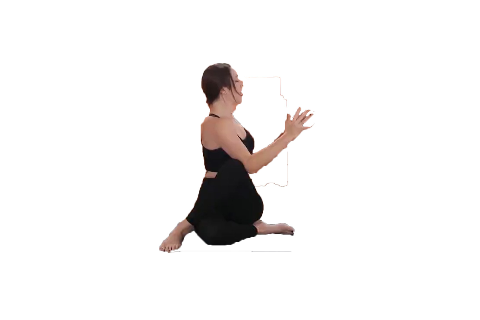

pose_6_frame_jong.png
similarity: 89.09517142857143


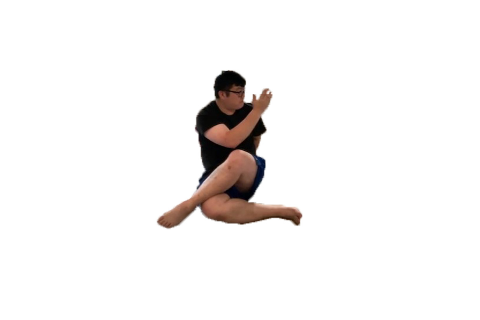

pose_6_frame_lori.png
similarity: 78.95903333333334


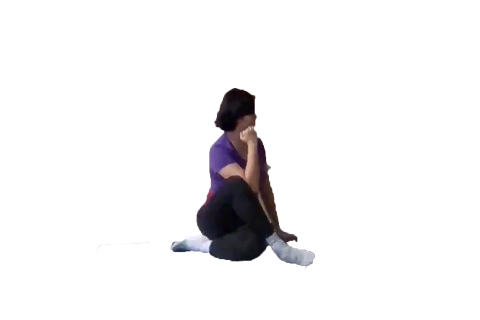

pose_6_frame_mikaela.png
similarity: 85.6711


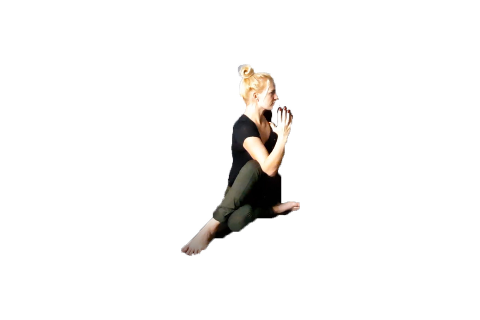

pose_4_error
similarity: 79.51840476190478


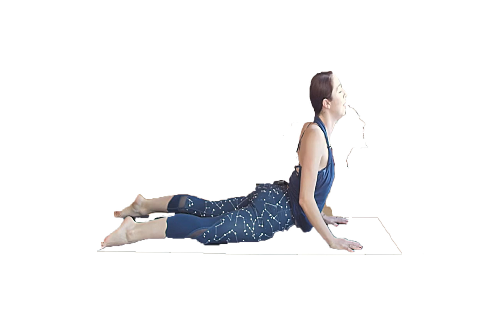

In [ ]:
i=0
for name, image in images.items():
  print(name)   
  resize_and_show(image, final_similarity[i])
  i+=1

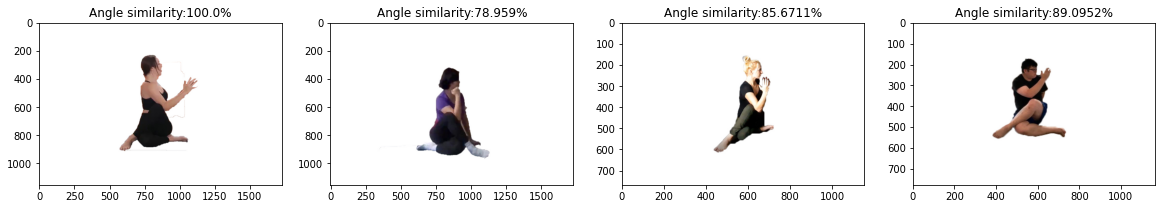

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 4, 1)
plt.title('Angle similarity:'+str(round(final_similarity[0],4))+'%')
plt.imshow(plt.imread(image_list[frame_num][0],0))
plt.subplot(1, 4, 2)
plt.title('Angle similarity:'+str(round(final_similarity[2],4))+'%')
plt.imshow(plt.imread(image_list[frame_num][2],0))
plt.subplot(1, 4, 3)
plt.title('Angle similarity:'+str(round(final_similarity[3],4))+'%')
plt.imshow(plt.imread(image_list[frame_num][3],0))
plt.subplot(1, 4, 4)
plt.title('Angle similarity:'+str(round(final_similarity[1],4))+'%')
plt.imshow(plt.imread(image_list[frame_num][1],0))
plt.show()

End

--------------------------------------------------------------